In [3]:
#Load in required libraries, if you have not installed these libraries, you can use the install.packages command 
library(data.table)
library(tidyverse)
library(forecast)
library(lmtest)
library(plyr)
library(lmtest)
library(ggplot2)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
--------------

In [4]:
#read in the cleaned data file
data<-read_csv('C:\\Users\\Asus\\Desktop\\DataREACH\\Surveillance\\Tidy_Data\\Paludisme.csv')

ERROR: Error: 'C:\Users\Asus\Desktop\DataREACH\Surveillance\Tidy_Data\Paludisme.csv' does not exist.


In [5]:
# Further cleaning for data
# remove NA at the end
data <- data[,-c(148:160)]
# set 56th and 71st row to zero due to NA
data[56,] <- seq(0,0,length.out=ncol(data))
data[71,] <- seq(0,0,length.out=ncol(data))

ERROR: Error in data[, -c(148:160)]: object of type 'closure' is not subsettable


In [6]:
# Convert the numerical data to numerical type
cols = c(4:147);    
data[,cols] = apply(data[,cols], 2, function(x) as.numeric(as.character(x)))

ERROR: Error in data[, cols]: object of type 'closure' is not subsettable


In [7]:
data

function (..., list = character(), package = NULL, lib.loc = NULL, 
    verbose = getOption("verbose"), envir = .GlobalEnv) 
{
    fileExt <- function(x) {
        db <- grepl("\\.[^.]+\\.(gz|bz2|xz)$", x)
        ans <- sub(".*\\.", "", x)
        ans[db] <- sub(".*\\.([^.]+\\.)(gz|bz2|xz)$", "\\1\\2", 
            x[db])
        ans
    }
    names <- c(as.character(substitute(list(...))[-1L]), list)
    if (!is.null(package)) {
        if (!is.character(package)) 
            stop("'package' must be a character string or NULL")
        if (any(package %in% "base")) 
            warning("datasets have been moved from package 'base' to package 'datasets'")
        if (any(package %in% "stats")) 
            warning("datasets have been moved from package 'stats' to package 'datasets'")
        package[package %in% c("base", "stats")] <- "datasets"
    }
    paths <- find.package(package, lib.loc, verbose = verbose)
    if (is.null(lib.loc)) 
        paths <- c(path.package(package, TRUE), if (!length(package)) getwd(), 
            paths)
    paths <- unique(normalizePath(paths[file.exists(paths)]))
    paths <- paths[dir.exists(file.path(paths, "data"))]
    dataExts <- tools:::.make_file_exts("data")
    if (length(names) == 0L) {
        db <- matrix(character(), nrow = 0L, ncol = 4L)
        for (path in paths) {
            entries <- NULL
            packageName <- if (file_test("-f", file.path(path, 
                "DESCRIPTION"))) 
                basename(path)
            else "."
            if (file_test("-f", INDEX <- file.path(path, "Meta", 
                "data.rds"))) {
                entries <- readRDS(INDEX)
            }
            else {
                dataDir <- file.path(path, "data")
                entries <- tools::list_files_with_type(dataDir, 
                  "data")
                if (length(entries)) {
                  entries <- unique(tools::file_path_sans_ext(basename(entries)))
                  entries <- cbind(entries, "")
                }
            }
            if (NROW(entries)) {
                if (is.matrix(entries) && ncol(entries) == 2L) 
                  db <- rbind(db, cbind(packageName, dirname(path), 
                    entries))
                else warning(gettextf("data index for package %s is invalid and will be ignored", 
                  sQuote(packageName)), domain = NA, call. = FALSE)
            }
        }
        colnames(db) <- c("Package", "LibPath", "Item", "Title")
        footer <- if (missing(package)) 
            paste0("Use ", sQuote(paste("data(package =", ".packages(all.available = TRUE))")), 
                "\n", "to list the data sets in all *available* packages.")
        else NULL
        y <- list(title = "Data sets", header = NULL, results = db, 
            footer = footer)
        class(y) <- "packageIQR"
        return(y)
    }
    paths <- file.path(paths, "data")
    for (name in names) {
        found <- FALSE
        for (p in paths) {
            if (file_test("-f", file.path(p, "Rdata.rds"))) {
                rds <- readRDS(file.path(p, "Rdata.rds"))
                if (name %in% names(rds)) {
                  found <- TRUE
                  if (verbose) 
                    message(sprintf("name=%s:\t found in Rdata.rds", 
                      name), domain = NA)
                  thispkg <- sub(".*/([^/]*)/data$", "\\1", p)
                  thispkg <- sub("_.*$", "", thispkg)
                  thispkg <- paste0("package:", thispkg)
                  objs <- rds[[name]]
                  lazyLoad(file.path(p, "Rdata"), envir = envir, 
                    filter = function(x) x %in% objs)
                  break
                }
                else if (verbose) 
                  message(sprintf("name=%s:\t NOT found in names() of Rdata.rds, i.e.,\n\t%s\n", 
                    name, paste(names(rds), collapse = ",")), 
                    domain = NA)
            }
            if (file_test("-f", file.path(p, "Rdata.zip")

In [6]:
## replace NA with row means
#data_noNA <- cbind(data)
#for ( r in 1:nrow(data) ){
#    data_noNA[r, is.na(data[r,])] <- rowMeans(data[r,cols], na.rm = 1)
#}

In [7]:
# replace NA with mean of predecessor and follower
N <- nrow(data)
data_noNA <- as.tibble(cbind(data))
for ( r in 1:N ){
    for ( c in cols ){
        if (c==147) c
        if (is.na(data[r,c])){
            # find the prev
            has_prev <- FALSE
            for (i in c:4){
                if (!is.na(data[r,i])){
                    has_prev <- TRUE
                    prev <- data[r,i]
                    break
                }
            } 
            # find post
            has_post <- FALSE
            for (j in c:147){
                if (!is.na(data[r,j])){
                    has_post <- TRUE
                    post <- data[r,j]
                    break
                }
            }
            data_noNA[r,c] <- 0
            if (has_prev){
                data_noNA[r,c] <- data_noNA[r,c]+prev
            }
            if (has_post){
                data_noNA[r,c] <- (data_noNA[r,c]+post)/(1+has_prev)
            }
        } 
    }
}

In [8]:
r = 3
data_noNA[r,]
data[r,]

X1,Province,Region,W 1,W 2,W 3,W 4,W 5,W 6,W 7,...,W 135,W 136,W 137,W 138,W 139,W 140,W 141,W 142,W 143,W 144
3,ADAMAOUA,DJOHONG,0,0,97,23,83,85,24,...,85,25,142,84,32,24,71,36,49,49


X1,Province,Region,W 1,W 2,W 3,W 4,W 5,W 6,W 7,...,W 135,W 136,W 137,W 138,W 139,W 140,W 141,W 142,W 143,W 144
3,ADAMAOUA,DJOHONG,NA,0,97,23,83,85,24,...,85,25,142,84,32,24,71,36,49,NA


In [9]:
any(is.na(data_noNA))
data_noNA

[1] FALSE

X1,Province,Region,W 1,W 2,W 3,W 4,W 5,W 6,W 7,...,W 135,W 136,W 137,W 138,W 139,W 140,W 141,W 142,W 143,W 144
1,ADAMAOUA,BANKIM,19,47,55,6,59.0,64,84,...,12,17,22.0,34,51,29,26,25,36,35
2,ADAMAOUA,BANYO,92,73,38,36,104.0,32,43,...,40,35,50.0,45,38,23,60,46,59,63
3,ADAMAOUA,DJOHONG,0,0,97,23,83.0,85,24,...,85,25,142.0,84,32,24,71,36,49,49
4,ADAMAOUA,MEIGANGA,24,32,32,12,18.5,25,15,...,189,144,133.0,145,122,132,214,312,170,190
5,ADAMAOUA,NGAOUNDAL,110,110,86,108,84.0,78,40,...,228,206,118.0,191,168,103,80,144,112,240
6,ADAMAOUA,NGAOUNDERE RURAL,379,377,367,318,346.0,251,282,...,258,209,221.0,256,279,301,375,310,320,368
7,ADAMAOUA,NGAOUNDERE URBAIN,509,533,613,552,524.0,443,473,...,375,379,363.0,343,350,231,252,340,382,478
8,ADAMAOUA,TIBATI,82,82,58,59,76.0,82,50,...,45,90,97.0,104,125,68,77,44,114,109
9,ADAMAOUA,TIGNERE,86,86,168,153,76.0,131,157,...,101,175,151.0,166,146,182,157,112,158,196
10,CENTRE,AKONOLINGA,9,16,13,16,10.0,7,18,...,49,54,59.0,51,61,57,47,41,10,17


In [1]:
index2region <- function(index){
    return( paste(data_noNA[index,3],data_noNA[index,2],sep=",") )
}

In [2]:
index2region(2)

ERROR: Error in paste(data_noNA[index, 3], data_noNA[index, 2], sep = ","): object 'data_noNA' not found


In [10]:
five_week_sum <- function(CrossCorr){
score <- 0
for (lag in -5:5){
    corr <- CrossCorr[lag][[1]]
    score <- score + 5*corr
}
return(score)
}

In [11]:
five_week_weighted_sum <- function(CrossCorr){
score <- 0
for (lag in -5:5){
    corr <- CrossCorr[lag][[1]]
    score <- score + 10.0/(abs(lag)+1)*corr
}
return(score)
}

In [12]:
two_week_weighted_sum <- function(CrossCorr){
score <- 0
for (lag in -2:2){
    corr <- CrossCorr[lag][[1]]
    score <- score + 15.0/(abs(lag)+1)*corr
}
return(score)
}

In [13]:
### source: http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/xegbohtmlnode39.html
### source: https://stackoverflow.com/questions/15551209/cross-correlation-using-ccf-in-r
calc_upperCI <- function(T, confidence){
    CI <- qnorm((1 + confidence)/2)/sqrt(T)
    return (CI)
}

In [15]:
score_mat <- matrix(nrow=N, ncol=N)
# the (i,j) entry of score mat correspond to ccf(i,j)
for (i in 1:N){
    for (j in 1:N){
        if (j > i){
        TS1<-as.ts(as.numeric(data_noNA[i, 4:ncol(data_noNA)])) 
        TS2<-as.ts(as.numeric(data_noNA[j, 4:ncol(data_noNA)]))
        CrossCorr<-ccf(TS1, TS2, lag = 5, pl = FALSE)
        score_mat[i,j] <- five_week_weighted_sum(CrossCorr)
        }
    }
}

In [16]:
score_mat

NA,7.494927,4.968743,0.5349328,5.960816,9.822449,7.673412,6.20885,7.454862,-0.6305237,...,-6.2602604,-0.19005887,-5.653825,-4.5992337,2.361429,-0.4141592,-2.3305679,-1.0412677,-3.1335593,3.27307899
NA,NA,7.331549,4.9012916,13.063067,15.951327,11.947590,13.91541,14.412925,7.0317433,...,-2.0197369,-7.04244639,5.342578,-1.6183997,8.306153,6.3593465,1.8245228,4.6298375,-6.3875819,0.12723712
NA,NA,NA,-2.0400377,1.909075,13.338366,13.074961,9.60670,14.356494,2.2818522,...,3.1515690,1.73332442,1.839919,-5.1327146,4.209197,2.3867171,5.5525339,1.8896011,2.1878418,-1.23450473
NA,NA,NA,NA,17.707871,9.921468,-3.420247,10.66532,4.131774,19.3183580,...,7.0898667,4.27249693,12.348288,12.8740522,-2.619417,6.3979543,5.0174355,8.4806761,6.6873968,2.48952282
NA,NA,NA,NA,NA,16.651939,6.768075,11.29812,9.130552,17.8781978,...,5.8135566,-5.63556262,8.141278,9.8754571,3.275563,10.1113684,3.3985105,5.8182649,1.2010786,-1.44492690
NA,NA,NA,NA,NA,NA,20.178898,16.40096,19.089753,13.3519604,...,5.7241918,-3.04161922,7.004933,2.3014851,7.706413,10.0414315,6.0985764,5.4349518,2.6465078,-3.21500753
NA,NA,NA,NA,NA,NA,NA,8.41636,15.167453,-0.2043780,...,2.4172872,-3.99719319,-1.417860,-4.4879862,6.466974,6.2518541,0.1324688,-0.7451278,-3.0687255,-4.94412411
NA,NA,NA,NA,NA,NA,NA,NA,14.043506,12.2919340,...,4.0568434,0.95374131,9.210262,1.2566786,7.791693,4.9638962,7.8192111,7.5421512,2.0562590,-0.44976338
NA,NA,NA,NA,NA,NA,NA,NA,NA,6.6629580,...,3.5830122,-0.42087683,6.141256,-3.2754374,7.748523,6.2169996,5.2445221,5.6463682,-0.4215225,-0.63402623
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,10.7372817,-0.09666223,14.167582,11.8699214,2.496773,8.7998285,12.7308113,10.6614314,9.2130099,-1.13241751
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,-0.1096477,4.34797617,6.204484,-3.4588275,7.056129,1.7471763,6.4199761,6.6479946,1.9740372,2.21872933


In [17]:
process_scores<- function(score_mat){
    # summary stats of scores
    scores = c(score_mat)
    print(summary(scores))
    print ( c("Mean: ",mean(scores,na.rm = TRUE)) )
    print( c("SD: ",sd(scores,na.rm = TRUE)) )
    hist(scores,
         breaks=50, freq=FALSE,
         main="Histogram of Correlation Scores",
         xlab="Correlation Score",
         col="steelblue")
    # heatmap of score matrix
    melted_score = melt(score_mat, na.rm = TRUE) 
    colnames(melted_score) <- c("Region1", "Region2", "Score")
    ggplot(data=melted_score, aes(x=Region1, y=Region2, fill=Score)) +
    geom_tile(colour="white") +
    scale_fill_gradient2(low = "#a6611a", high = "#018571", mid = "#f5f5f5", midpoint = 0)
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-23.752  -2.624   2.244   2.918   7.731  34.640   18330 
[1] "Mean: "           "2.91802900836282"
[1] "SD: "             "7.94646995464151"


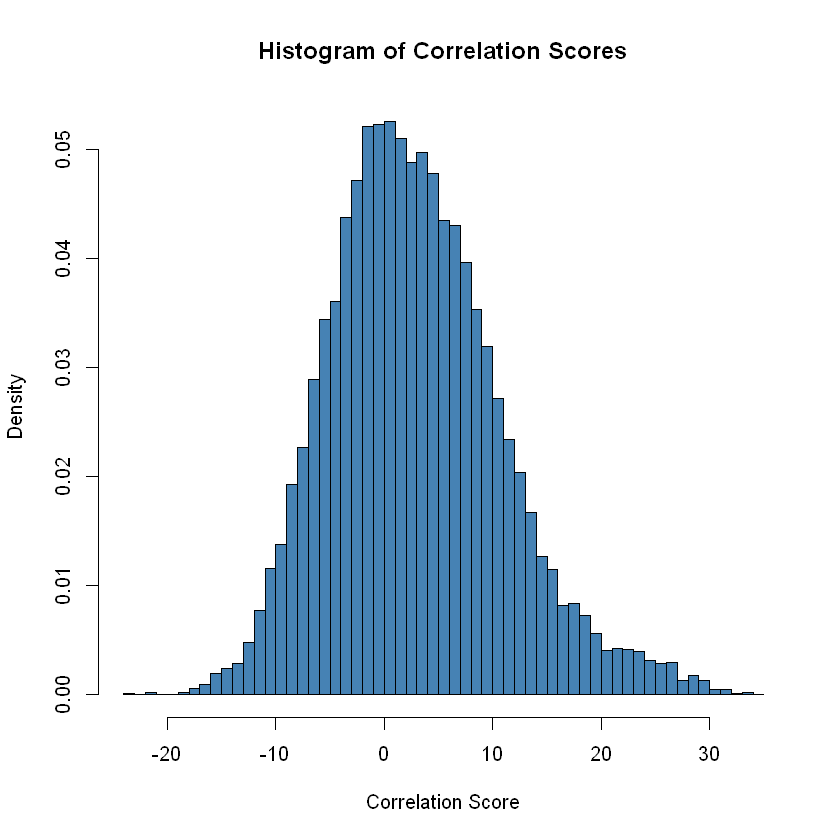

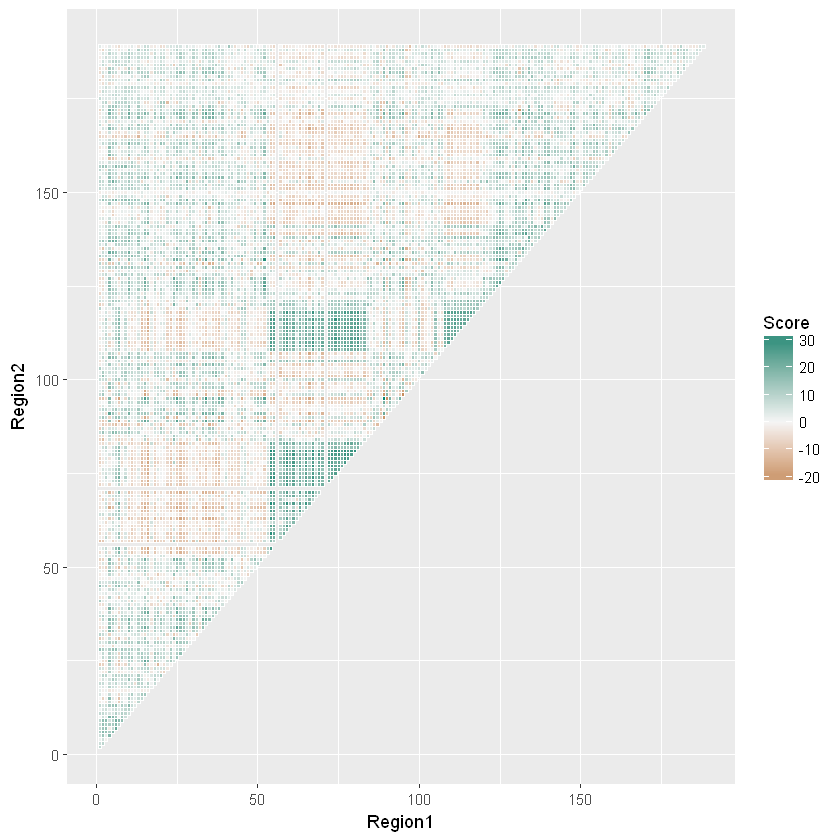

In [17]:
#################
# five-week sum #
#################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-22.306  -2.541   1.949   2.584   7.007  33.012   18330 
[1] "Mean: "           "2.58401409749341"
[1] "SD: "             "7.34279325209932"


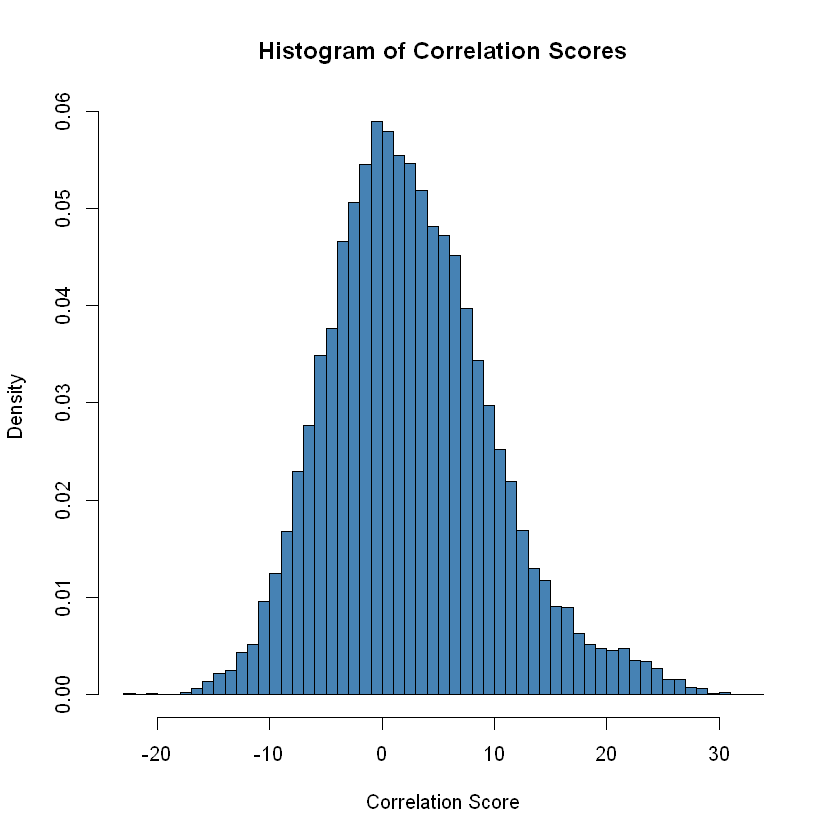

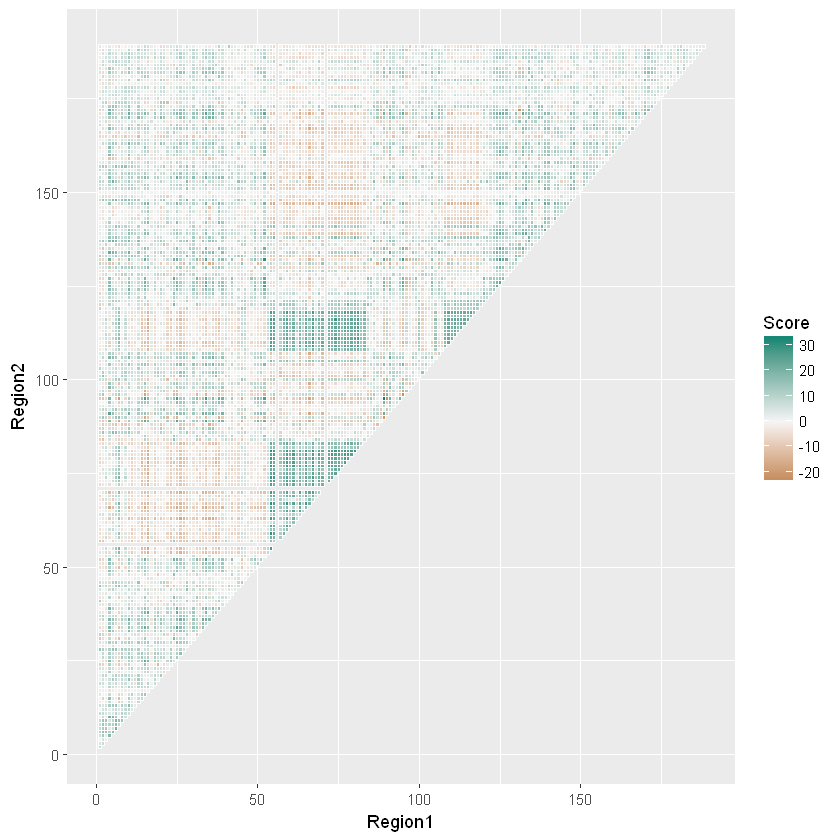

In [18]:
##########################
# five-week weighted sum #
##########################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-23.752  -2.624   2.244   2.918   7.731  34.640   18330 
[1] "Mean: "           "2.91802900836282"
[1] "SD: "             "7.94646995464151"


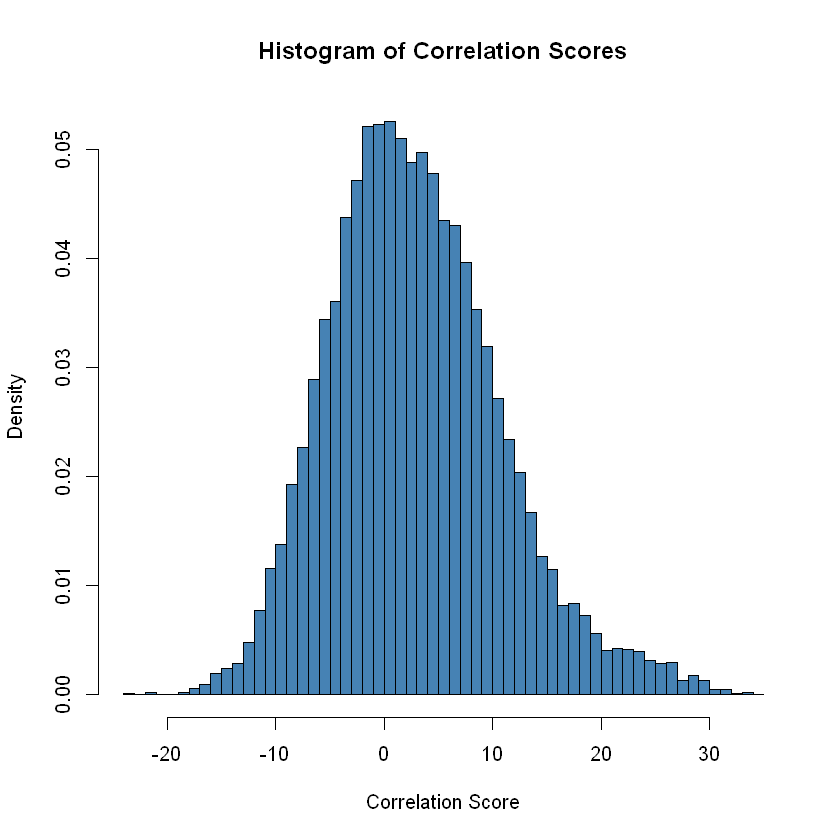

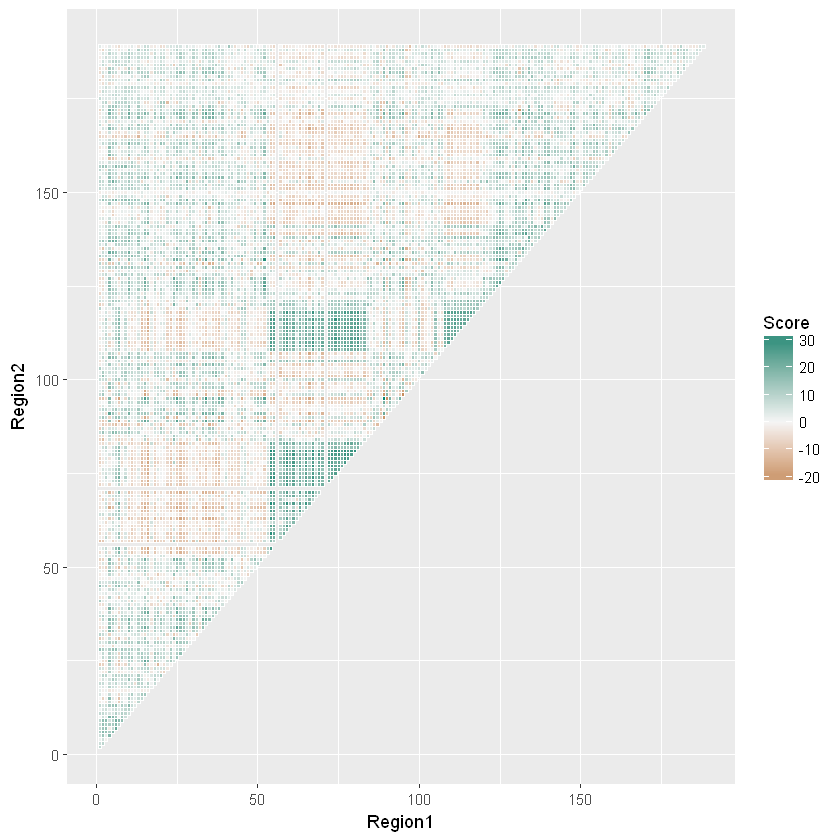

In [19]:
#########################
# two-week weighted sum #
#########################
process_scores(score_mat)

In [131]:
# Given two indices, plot their corrsponding time series
# if ccf_disp is TRUE, also plot the output graph of ccf function
visualize_corr <- function(index1, index2, ccf_disp=FALSE){
TS1<-ts(as.numeric(data_noNA[index1, 4:ncol(data_noNA)])) 
TS2<-ts(as.numeric(data_noNA[index2, 4:ncol(data_noNA)]))

ts.plot(TS1, TS2,
       gpars=list(xlab="Week", ylab="Cases", col=c("red","blue")))
legend("topleft",legend=c( paste(toString(index1),index2region(index1)), paste(toString(index2),index2region(index2))),
       col=c("red", "blue"),lty=c(1,1))

CrossCorr<-ccf(TS1, TS2, lag = 5, pl = ccf_disp)
score <- five_week_weighted_sum(CrossCorr)[[1]]
    
title(sub = paste( "Correlation Score =",toString(score) ))
if (ccf_disp){
    upperCI <- calc_upperCI(CrossCorr$n.used, 0.95)
    lowerCI <- -upperCI
    # verify CI
    lags <- -5:5
    my_upperCI <- rep(upperCI,11)
    points(lags, my_upperCI, col = "red")
    my_lowerCI <- rep(lowerCI,11)
    points(lags, my_lowerCI, col = "red")
    }
}

In [135]:
# Given a score matrix, and an interger k
# visualize_corr for top/bottom k scores(depending on the value of top)
# in the increasing order of scores
# ccf_disp dictates if the output graph of ccf is displayed
visualize_top_k <- function(score_mat, k, top=TRUE, ccf_disp=FALSE){
    sorted_scores = sort(c(score_mat))
    bottom_k = sorted_scores[1:k]
    top_k = tail(sorted_scores,k)
    if (top) {
        for (score in top_k){
            index_pair = which(score_mat == score, arr.ind = TRUE)
            visualize_corr(index_pair[1],index_pair[2],ccf_disp)
        }
    }
    else {
        for (score in bottom_k){
            index_pair = which(score_mat == score, arr.ind = TRUE)
            visualize_corr(index_pair[1],index_pair[2],ccf_disp)
        }
    }
}

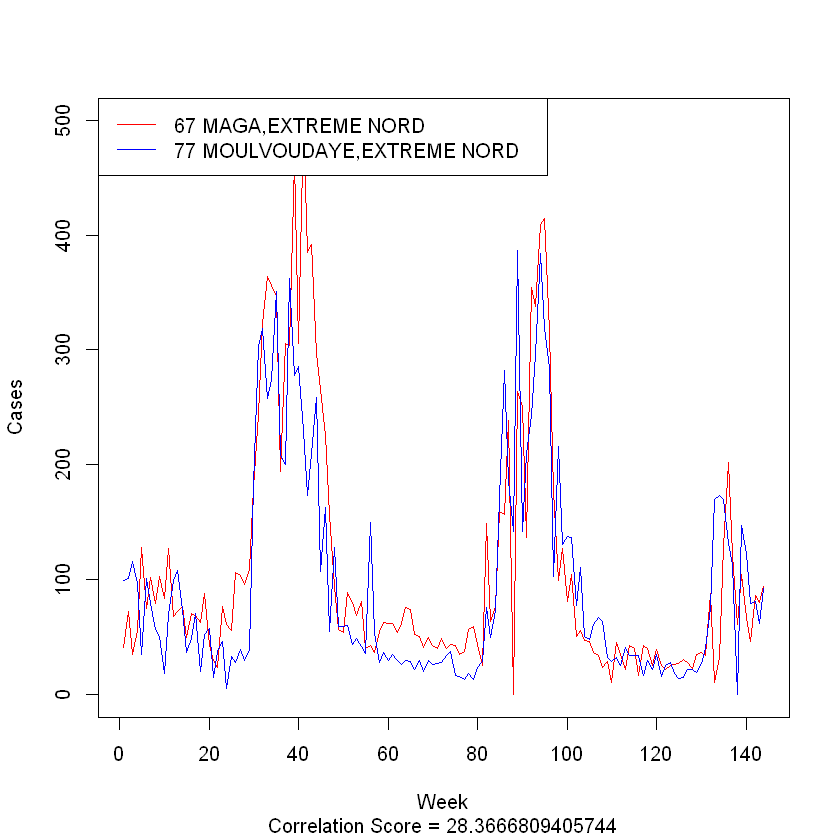

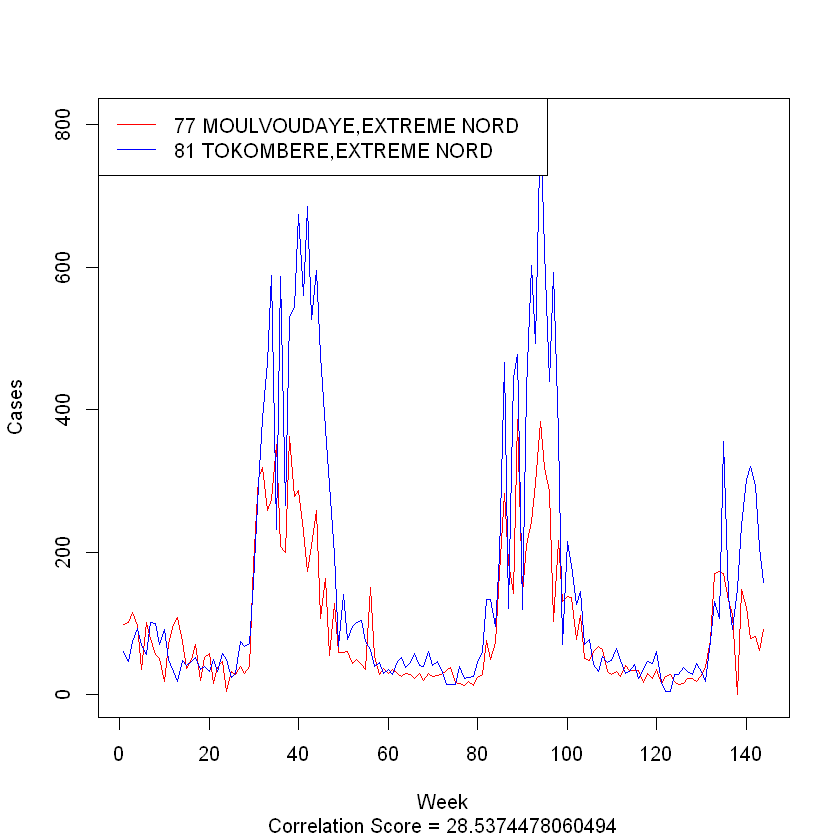

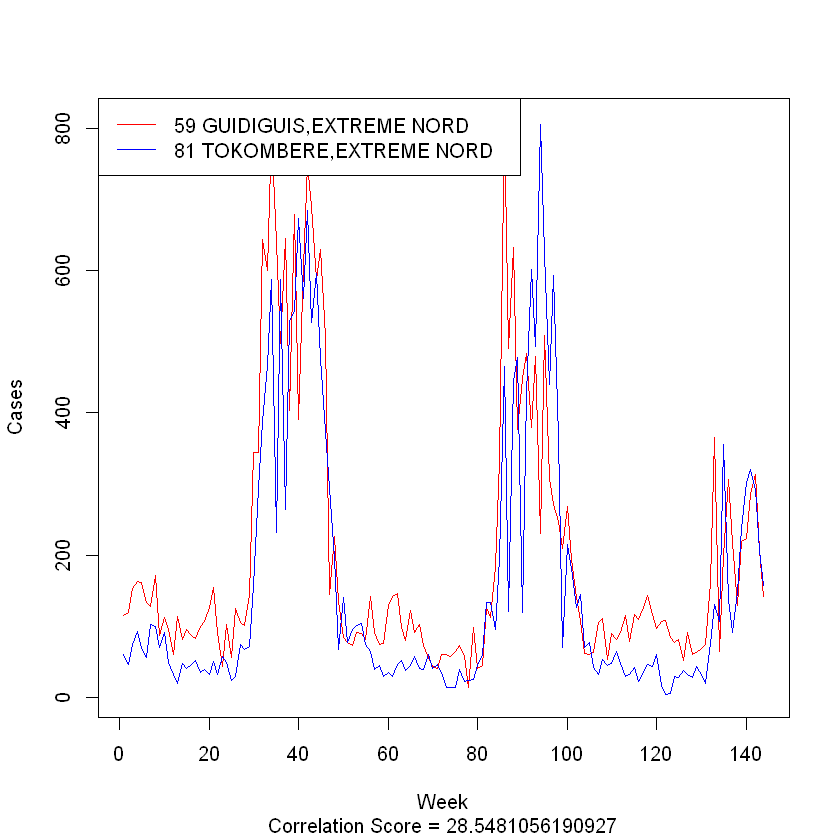

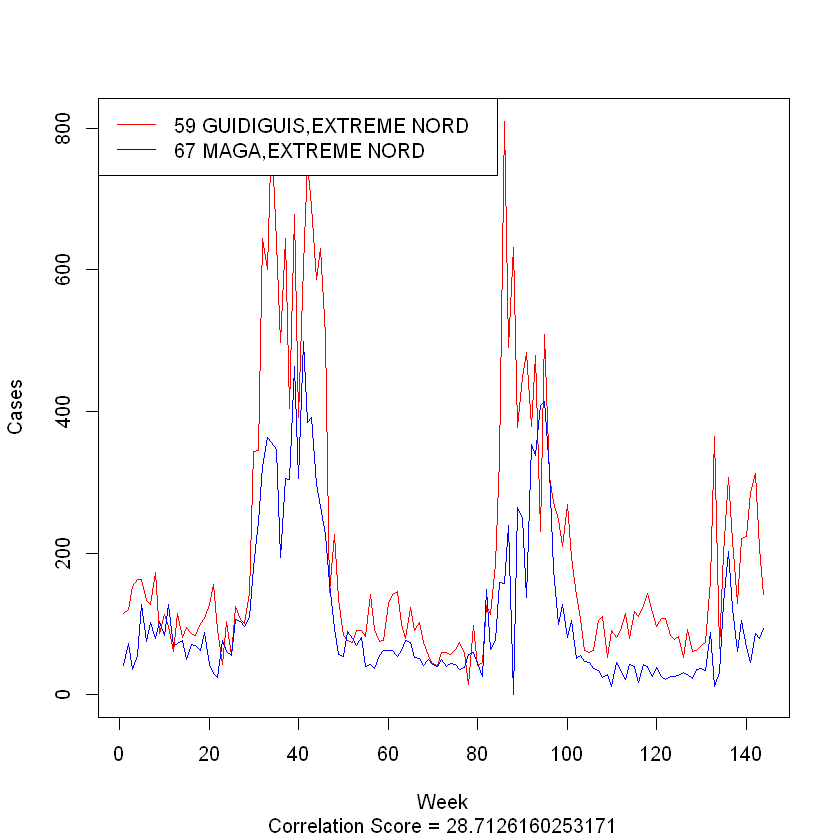

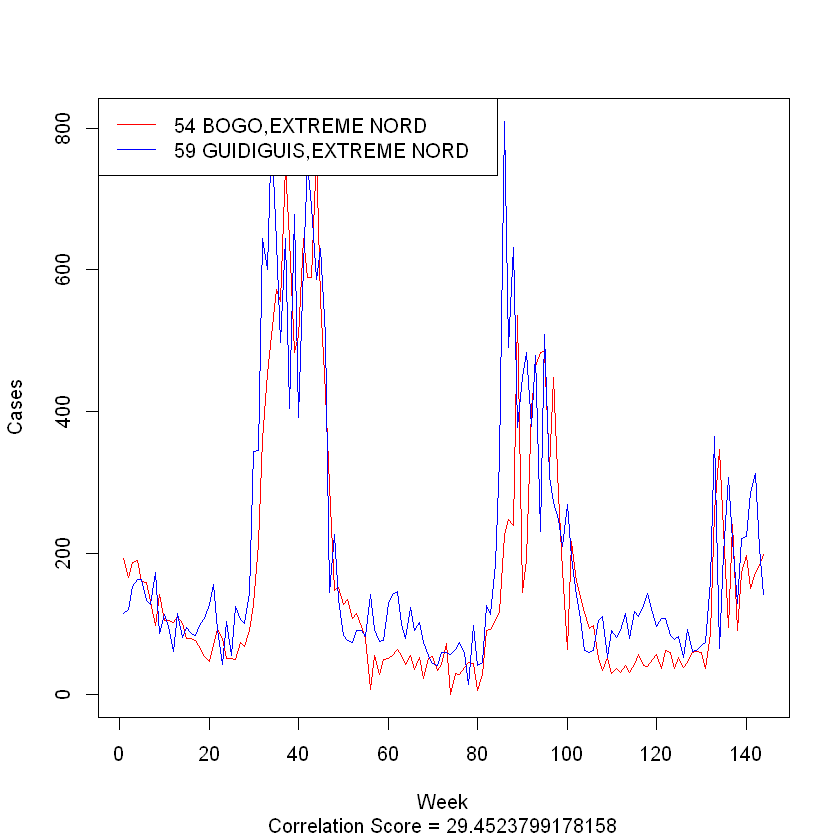

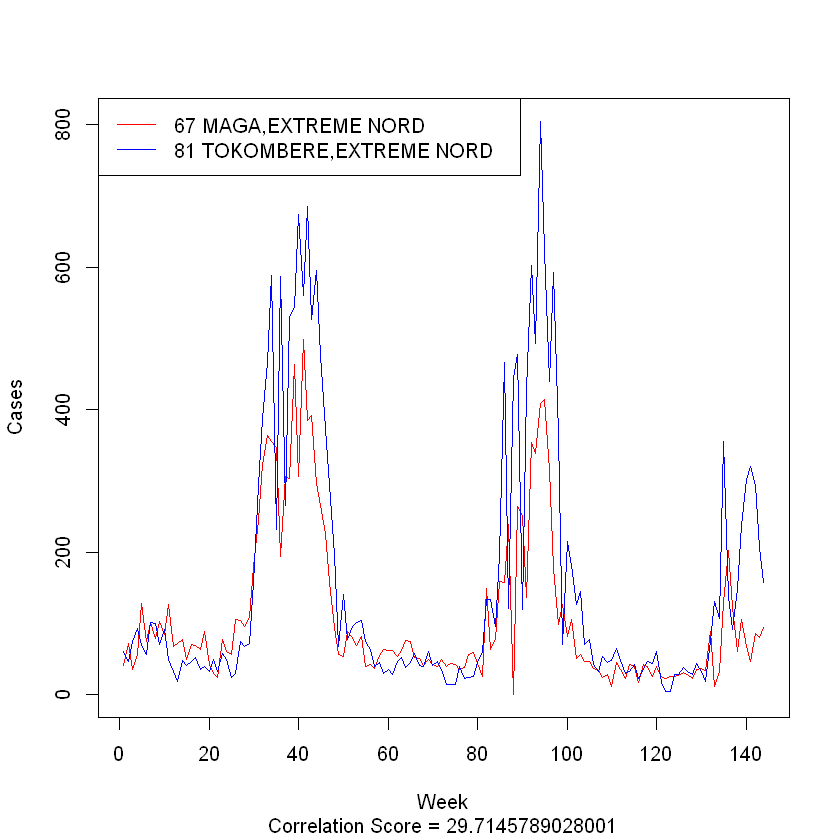

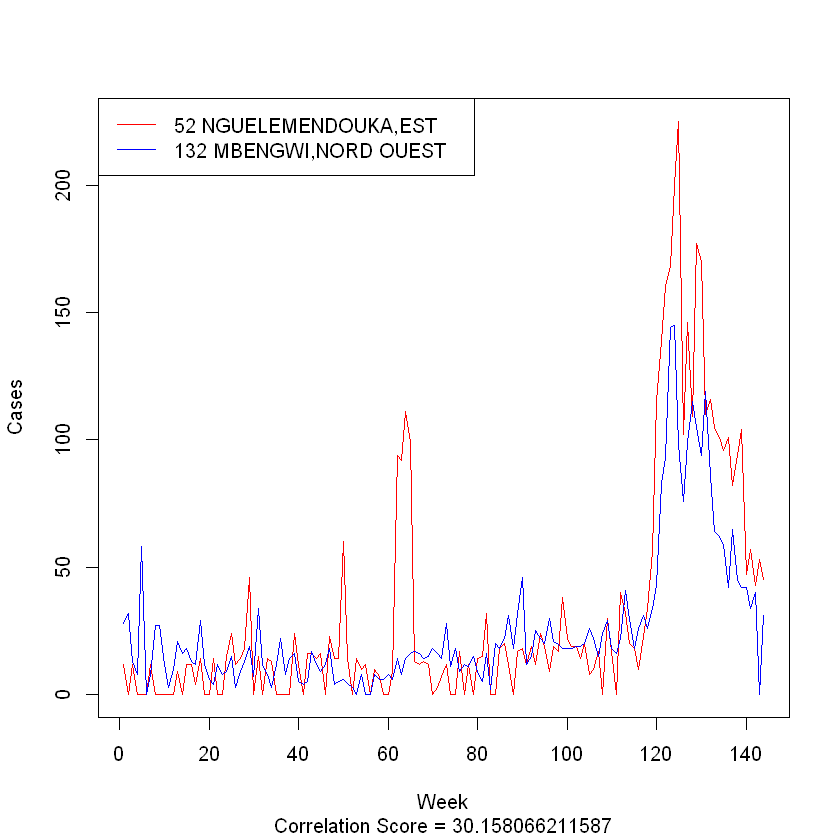

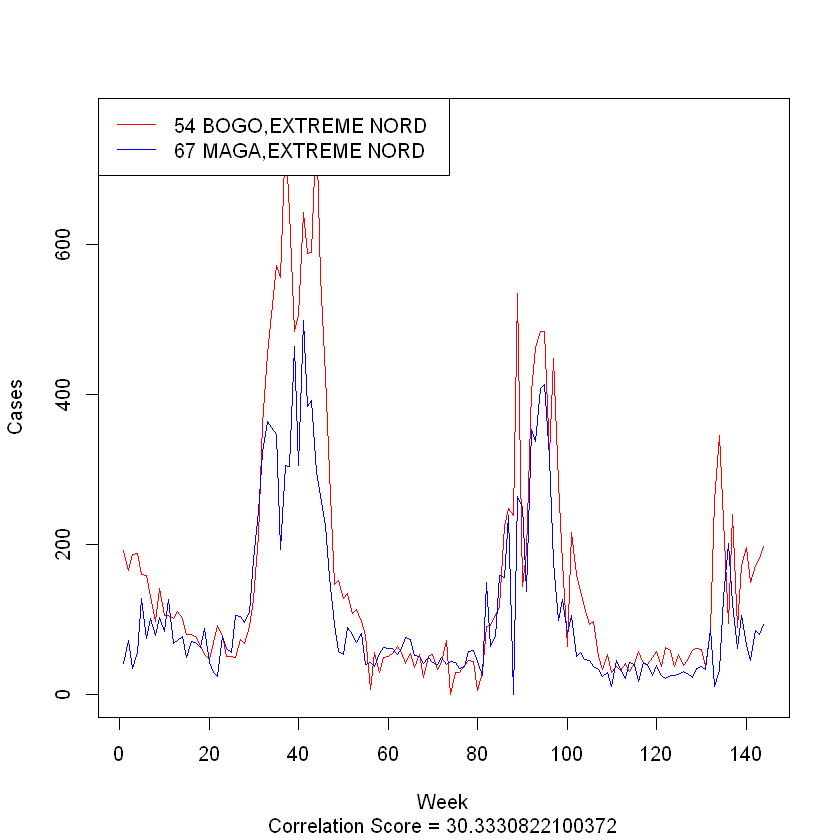

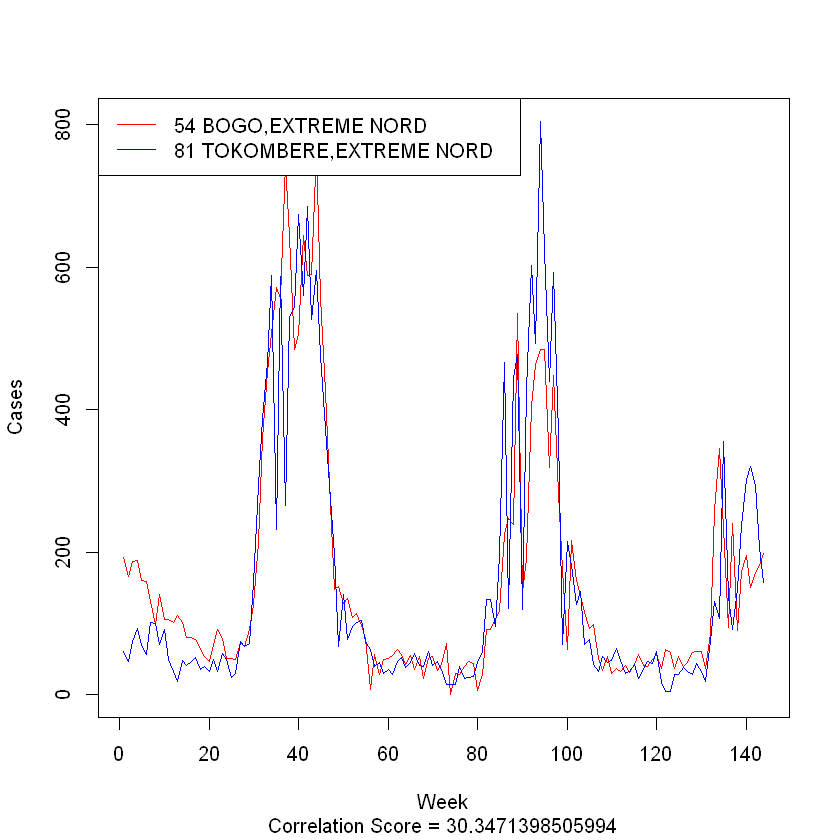

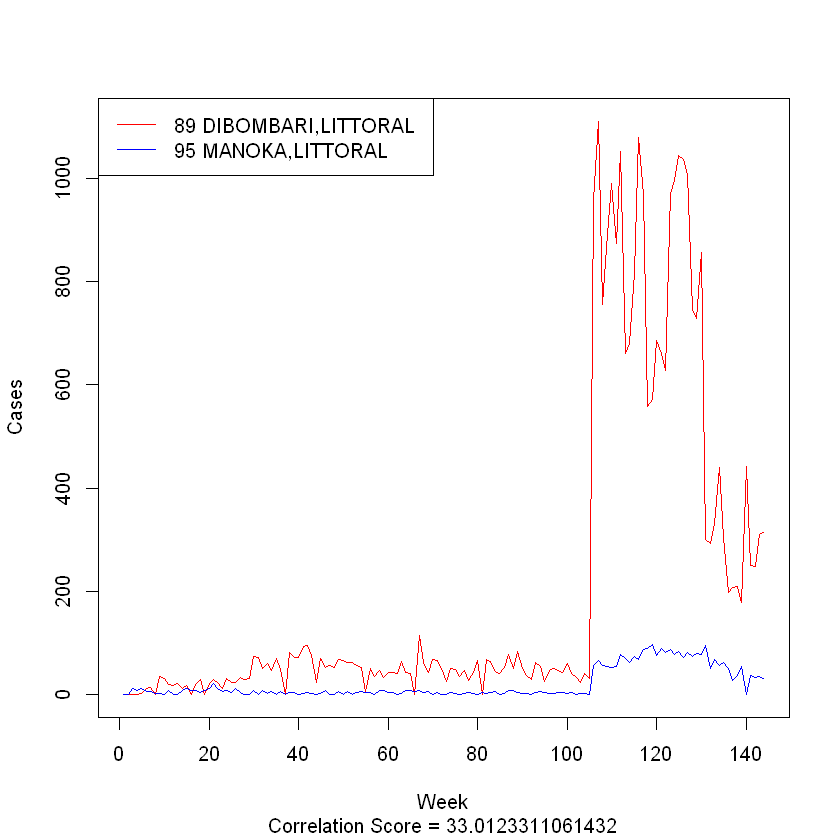

In [136]:
# visulization for top 10 scores (region pairs)
visualize_top_k(score_mat,10,top=TRUE,ccf_disp=FALSE)

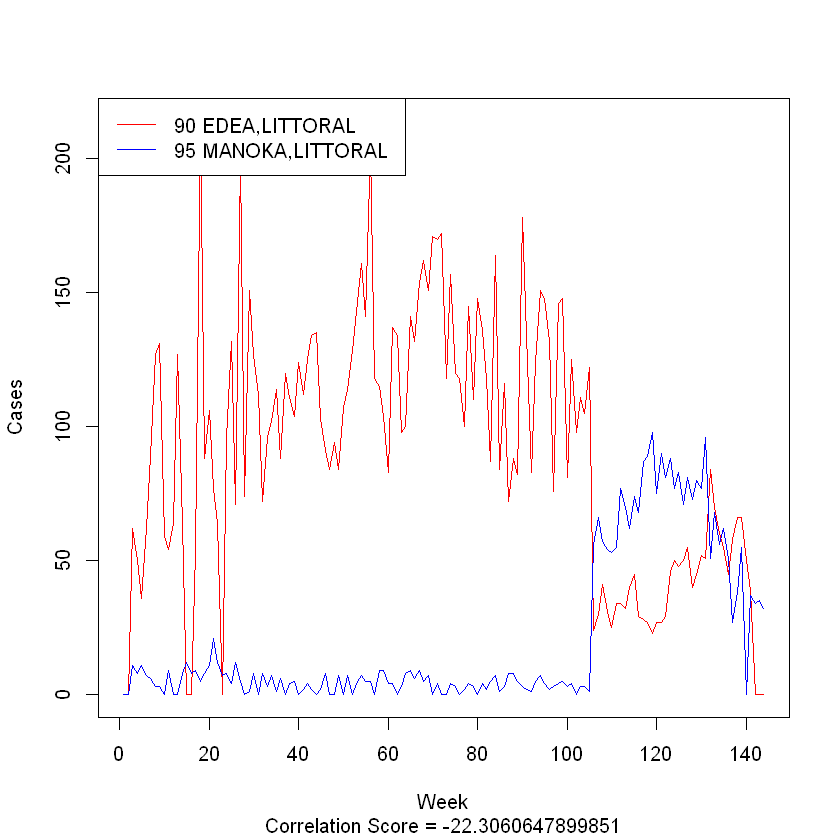

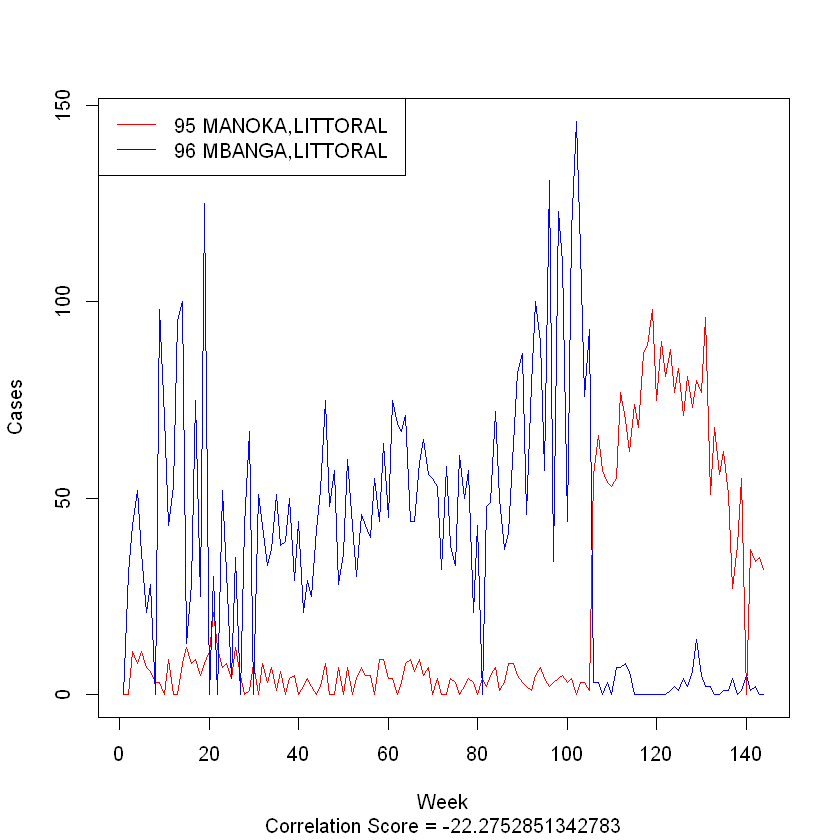

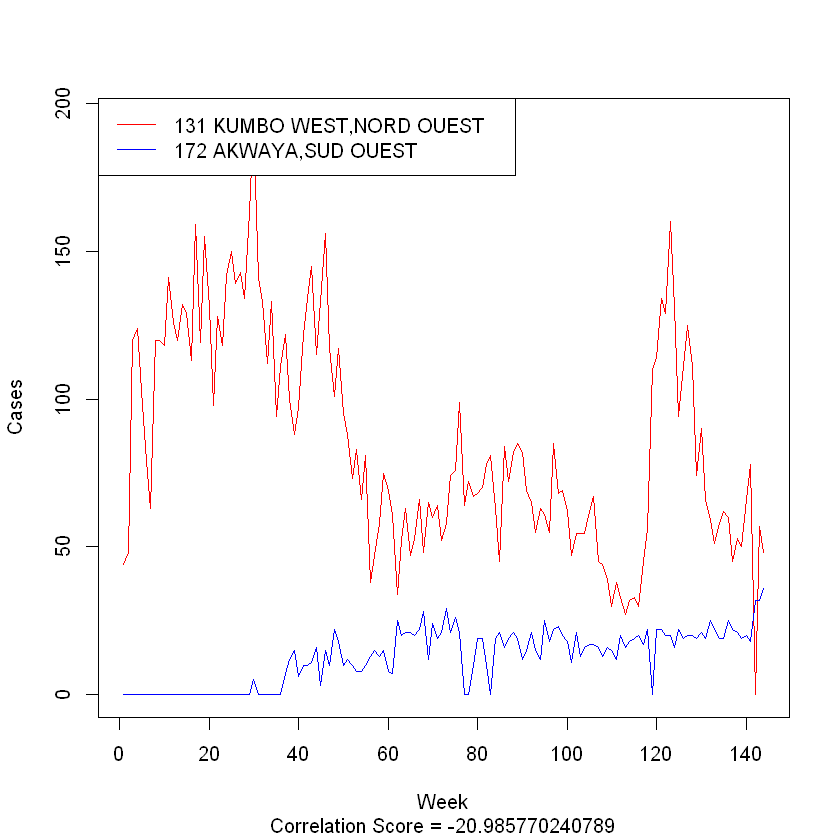

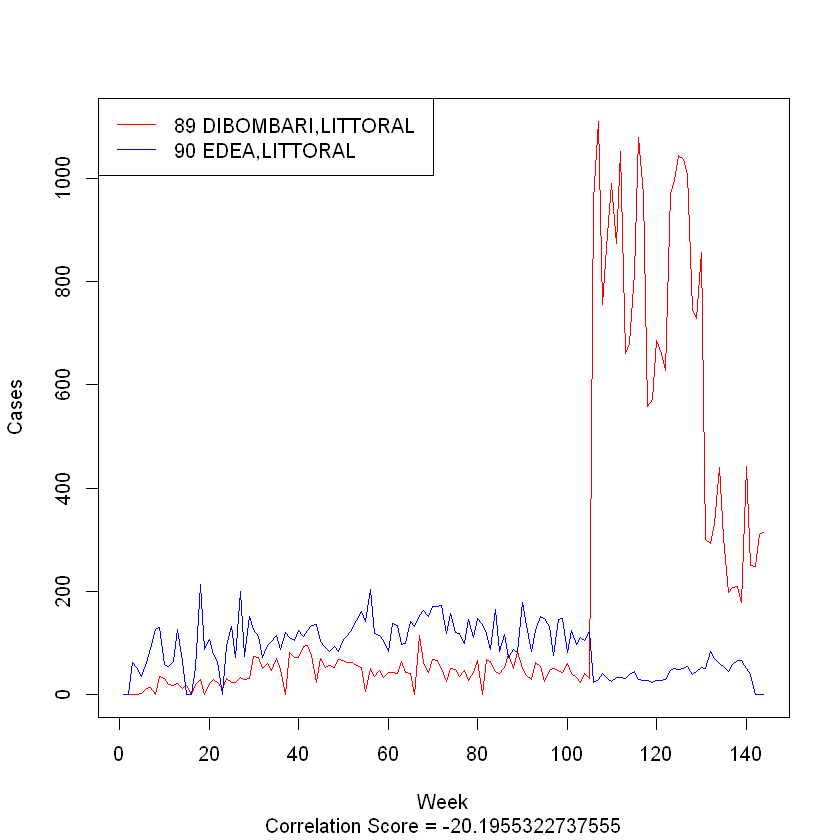

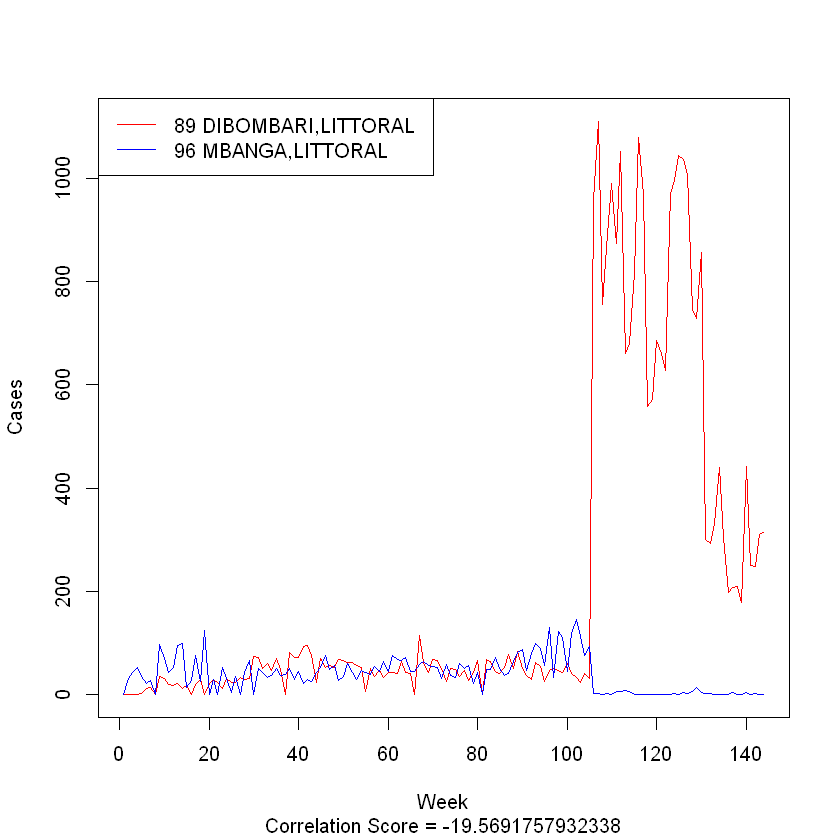

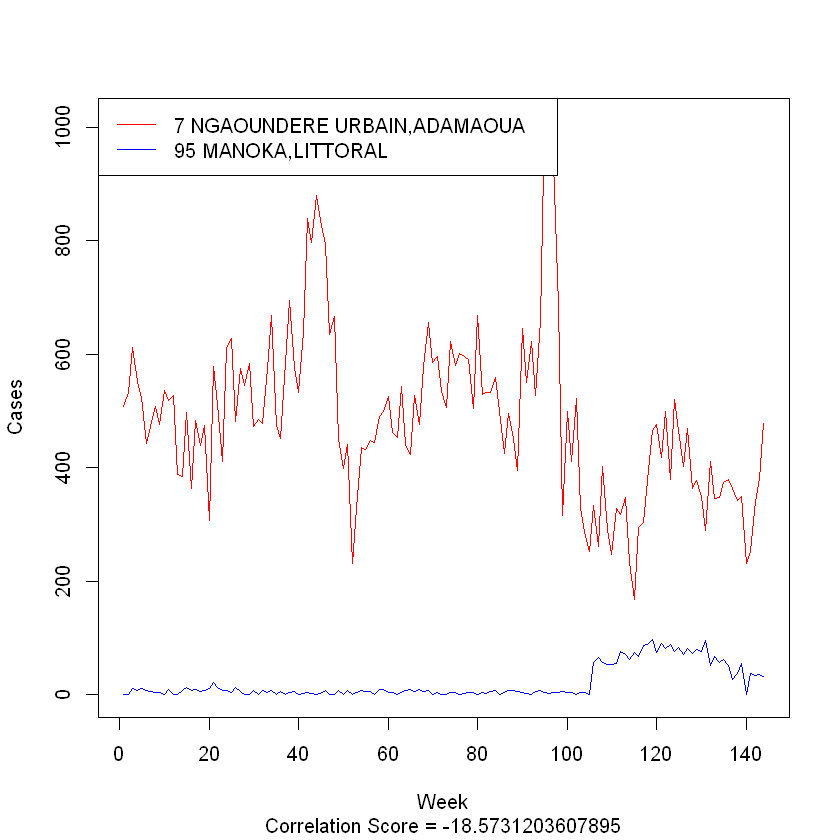

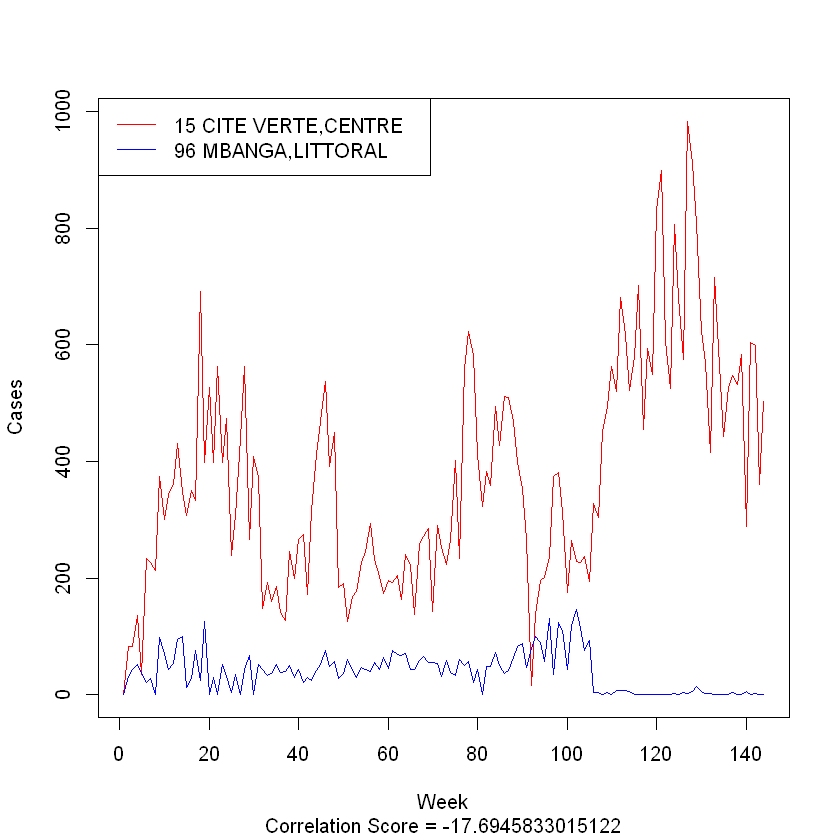

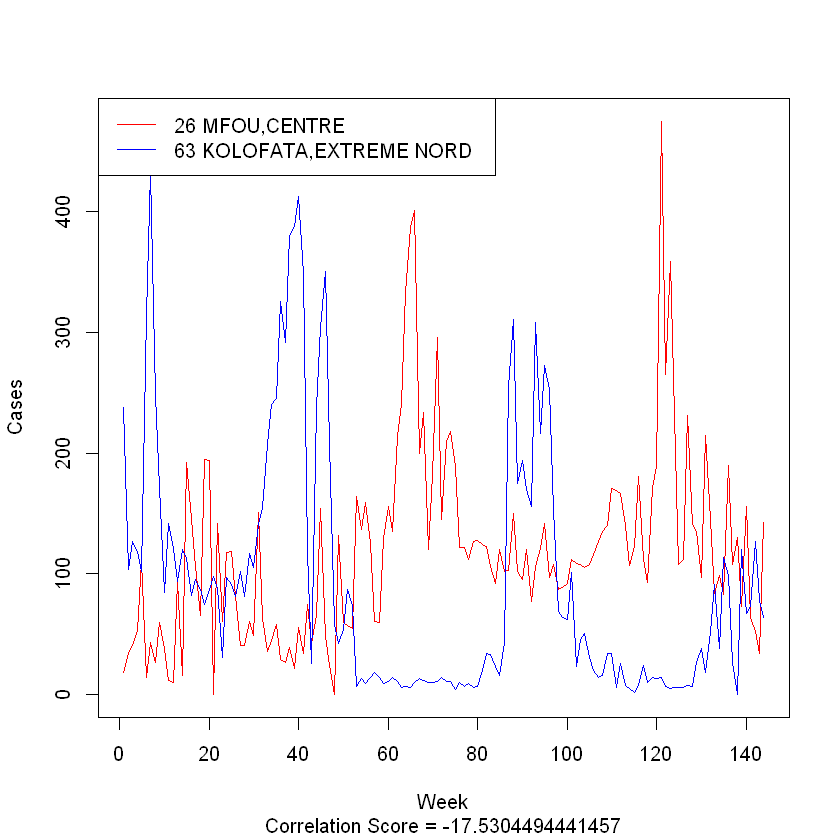

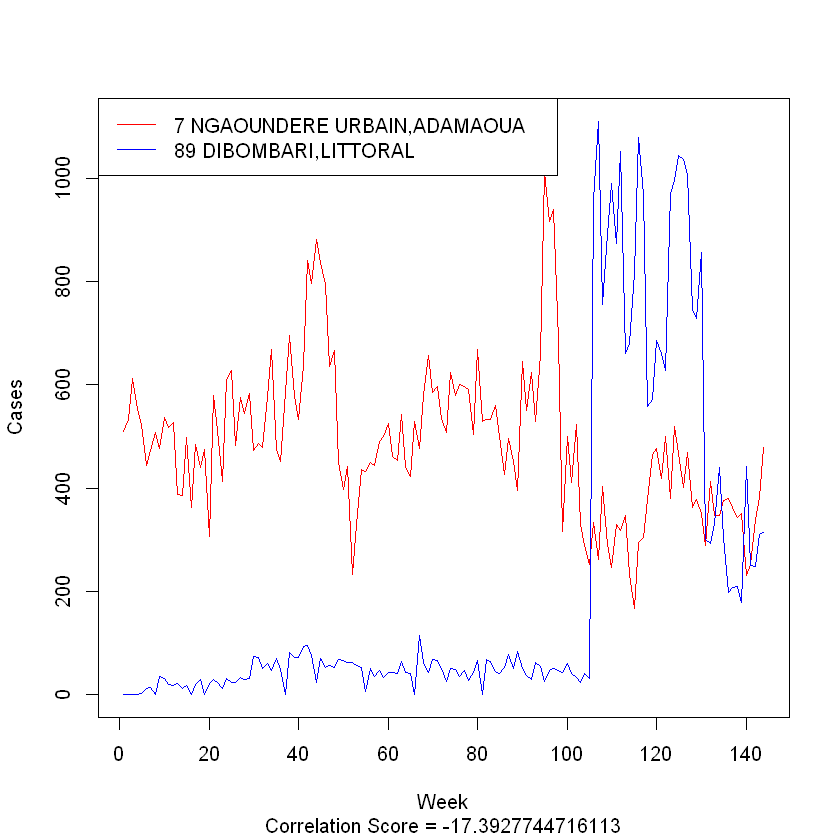

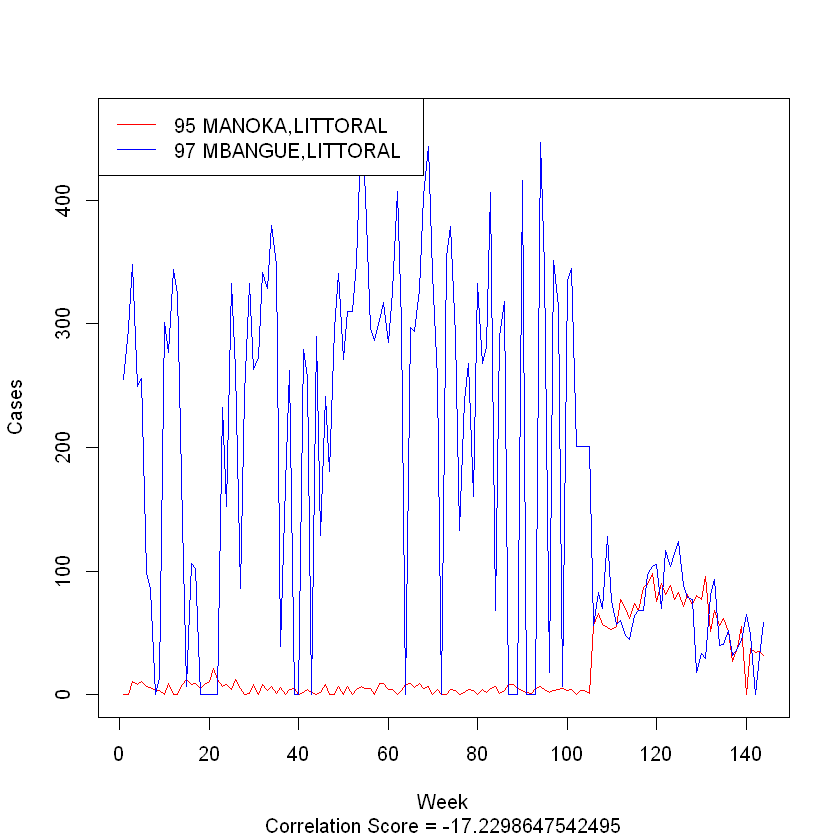

In [137]:
# visulization for bottom 10 scores (region pairs)
visualize_top_k(score_mat,10,top=FALSE,ccf_disp=FALSE)